In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import numpy as np
import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)

In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "icml2024"  # set to your entity and project 

In [3]:
# create dict mapping sweep name to sweep id
sweep_id_dict = {
    "inf_grid_mnist_sweep_000_50k": "xegejvhb",
    "inf_grid_mnist_sweep_000_50k_1": "vdfhrd8g",
    "inf_grid_mnist_sweep_000_50k_2": "vsnpg2te",
    "inf_grid_mnist_sweep_000_37k5": "59c3uexk",
    "inf_grid_mnist_sweep_000_37k5_1": "y6vxr0yb",
    "inf_grid_mnist_sweep_000_37k5_2": "smpwgumg",
    "inf_grid_mnist_sweep_000_25k": "kq36fzu9", 
    "inf_grid_mnist_sweep_000_25k_1": "38kq6q8f",
    "inf_grid_mnist_sweep_000_25k_2": "s7pj0ucn",
    "inf_grid_dsprites_sweep": "co5jijn1", 
    "inf_grid_dsprites_sweep_1": "lcr9fjj6",
    "inf_grid_dsprites_sweep_2": "sup5y2kj",
}

In [4]:
summary_list, config_list, name_list, tags, ids, states, sweeps = [], [], [], [], [], [],  []

for sweep, sweep_id in sweep_id_dict.items():
    runs = api.sweep(entity + "/" + project + "/" + sweep_id).runs

    for run in runs: 
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files 
        summary_list.append(run.summary._json_dict)

        # .config contains the hyperparameters.
        #  We remove special values that start with _.
        config_list.append(
            {k: v for k,v in run.config.items()
            if not k.startswith('_')})

        # .name is the human-readable name of the run.
        name_list.append(run.name)

        tags.append(run.tags)

        ids.append(run.id)

        states.append(run.state)

        sweeps.append(sweep)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states,
    "sweep": sweeps,
    })

runs_df

,summary,config,name,tags,id,state,sweep
0,"{'inf_plots_0': {'width': 1500, 'format': 'png...","{'lr': 0.001, 'seed': 0, 'angle': 0, 'model': ...",drawn-sweep-143,[],fidsfil9,finished,inf_grid_mnist_sweep_000_50k
1,"{'grad_norm': 1.031113862991333, '_timestamp':...","{'lr': 0.001, 'seed': 0, 'angle': 0, 'model': ...",robust-sweep-144,[],gf89114z,finished,inf_grid_mnist_sweep_000_50k
2,"{'inf_plots_2': {'_type': 'image-file', 'width...","{'lr': 0.001, 'seed': 0, 'angle': 0, 'model': ...",spring-sweep-142,[],ed4m3qrr,finished,inf_grid_mnist_sweep_000_50k
3,"{'inf_plots_4': {'width': 1500, 'format': 'png...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",stoic-sweep-141,[],xehq7s0v,finished,inf_grid_mnist_sweep_000_50k
4,"{'_wandb': {'runtime': 1438}, 'blur_sigma': 0,...","{'lr': 0.0003, 'seed': 0, 'angle': 0, 'model':...",stellar-sweep-140,[],0s66o3p9,finished,inf_grid_mnist_sweep_000_50k
...,...,...,...,...,...,...,...
1721,"{'_timestamp': 1701825403.0386424, 'inf_plots_...","{'lr': 0.0003, 'seed': 2, 'model': {'hidden_di...",royal-sweep-4,[],fy3oq8cu,finished,inf_grid_dsprites_sweep_2
1722,"{'inf_plots_5': {'width': 1500, 'format': 'png...","{'lr': 0.0003, 'seed': 2, 'model': {'hidden_di...",stilted-sweep-5,[],g2nfnw9q,finished,inf_grid_dsprites_sweep_2
1723,"{'valid/loss': 0.021723536774516106, 'train/x_...","{'lr': 0.0003, 'seed': 2, 'model': {'hidden_di...",easy-sweep-6,[],p30kazn0,finished,inf_grid_dsprites_sweep_2
1724,"{'inf_plots_0': {'_type': 'image-file', 'width...","{'lr': 0.0001, 'seed': 2, 'model': {'hidden_di...",light-sweep-3,[],xvstpl7m,finished,inf_grid_dsprites_sweep_2


In [5]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'sweep', 'summary.lr_σ',
       'summary.blur_sigma', 'summary.train/loss', 'summary.σ',
       'summary.train/x_mse',
       ...
       'config.aug_dsprites.square_distribution.scale',
       'config.aug_dsprites.square_distribution.x_position',
       'config.aug_dsprites.square_distribution.y_position',
       'config.aug_dsprites.square_distribution.orientation',
       'config.aug_dsprites.square_distribution.unnormalised_shape_prob',
       'config.aug_dsprites.ellipse_distribution.scale',
       'config.aug_dsprites.ellipse_distribution.x_position',
       'config.aug_dsprites.ellipse_distribution.y_position',
       'config.aug_dsprites.ellipse_distribution.orientation',
       'config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob'],
      dtype='object', length=123)

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] != 'failed']

# take only runs with certain tags
# tags_to_keep = ['angle_sweep', 'num_trn_sweep', 'mnist', 'vae']
# df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
# tags_to_remove = ['test', 'hidden', 'ssilvae']
# df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

# replace nans in config.num_trn and config.angle with -1
df_filtered['config.num_trn'] = df_filtered['config.num_trn'].fillna(-1)
df_filtered['config.angle'] = df_filtered['config.angle'].fillna(0)

df_filtered

,name,tags,id,state,sweep,summary.lr_σ,summary.blur_sigma,summary.train/loss,summary.σ,summary.train/x_mse,summary.train/invertibility_loss,summary._step,summary.train/η_recon_loss,summary._runtime,summary.valid/x_mse,summary.valid/invertibility_loss,summary.valid/label_paired_image_mse,summary.lr_inf,summary.valid/loss,summary.grad_norm,summary._timestamp,summary.valid/η_recon_loss,summary.inf_plots_0.width,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary._wandb.runtime,summary.inf_plots_2.path,summary.inf_plots_2.size,summary.inf_plots_2._type,summary.inf_plots_2.width,summary.inf_plots_2.format,summary.inf_plots_2.height,summary.inf_plots_2.sha256,summary.inf_plots_5.size,summary.inf_plots_5._type,summary.inf_plots_5.width,summary.inf_plots_5.format,summary.inf_plots_5.height,summary.inf_plots_5.sha256,summary.inf_plots_5.path,summary.inf_training_metrics.path,summary.inf_training_metrics.size,summary.inf_training_metrics._type,summary.inf_training_metrics.width,summary.inf_training_metrics.format,summary.inf_training_metrics.height,summary.inf_training_metrics.sha256,summary.inf_plots_3.sha256,summary.inf_plots_3.path,summary.inf_plots_3.size,summary.inf_plots_3._type,summary.inf_plots_3.width,summary.inf_plots_3.format,summary.inf_plots_3.height,summary.inf_plots_4.height,summary.inf_plots_4.sha256,summary.inf_plots_4.path,summary.inf_plots_4.size,summary.inf_plots_4._type,summary.inf_plots_4.width,summary.inf_plots_4.format,config.lr,config.seed,config.angle,config.steps,config.σ_lr,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.clip_norm,config.eval_freq,config.n_samples,config.val_split,config.batch_size,config.model_name,config.train_split,config.blur_end_pct,config.blur_σ_init,config.init_lr_mult,config.weight_decay,config.η_loss_mult,config.final_lr_mult,config.augment_bounds,config.augment_offset,config.translate_last,config.x_mse_loss_mult,config.blur_filter_size,config.warmup_steps_pct,config.interpolation_order,config.shuffle_buffer_size,config.repeat_after_batching,config.invertibility_loss_mult,config.model.hidden_dims,config.model.squash_to_bounds,config.aug_dsprites.heart_distribution.scale,config.aug_dsprites.heart_distribution.x_position,config.aug_dsprites.heart_distribution.y_position,config.aug_dsprites.heart_distribution.orientation,config.aug_dsprites.heart_distribution.unnormalised_shape_prob,config.aug_dsprites.square_distribution.scale,config.aug_dsprites.square_distribution.x_position,config.aug_dsprites.square_distribution.y_position,config.aug_dsprites.square_distribution.orientation,config.aug_dsprites.square_distribution.unnormalised_shape_prob,config.aug_dsprites.ellipse_distribution.scale,config.aug_dsprites.ellipse_distribution.x_position,config.aug_dsprites.ellipse_distribution.y_position,config.aug_dsprites.ellipse_distribution.orientation,config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob
0,drawn-sweep-143,[],fidsfil9,finished,inf_grid_mnist_sweep_000_50k,0.001,0.0,0.067826,0.000007,0.067429,0.003973,60000.0,0.114906,1434.582302,0.067115,0.003920,0.328576,1.000000e-06,0.067507,0.492628,1.701763e+09,0.114119,1500.0,png,300.0,fc63326057b3d3d1cb79249b8a59a632702d58aa3dc031...,media/images/inf_plots_0_summary_fc63326057b3d...,77624.0,image-file,f8ad7709986253d11c1e00dc8d878f3e5de7fb12d0af61...,media/images/inf_plots_1_summary_f8ad770998625...,82777.0,image-file,1500.0,png,300.0,1442.0,media/images/inf_plots_2_summary_a13bb328bfffa...,85393.0,image-file,1500.0,png,300.0,a13bb328bfffa5b354a407d49723ccd322877c5295a97f...,71282.0,image-file,1500.0,png,300.0,13d36c2dd12519871c671c59d968794da32154544fed95...,media/images/inf_plots_5_summary

In [7]:
df_filtered['config.angle'].unique()

array([0.])

In [8]:
df_filtered['config.steps'].unique()

array([60000.,    nan])

In [9]:
df_filtered['config.num_trn'].unique()

array([ 5.00e+04,  3.75e+04,  2.50e+04, -1.00e+00])

In [10]:
df_filtered['config.dataset'].unique()

array(['MNIST', 'aug_dsprites', nan], dtype=object)

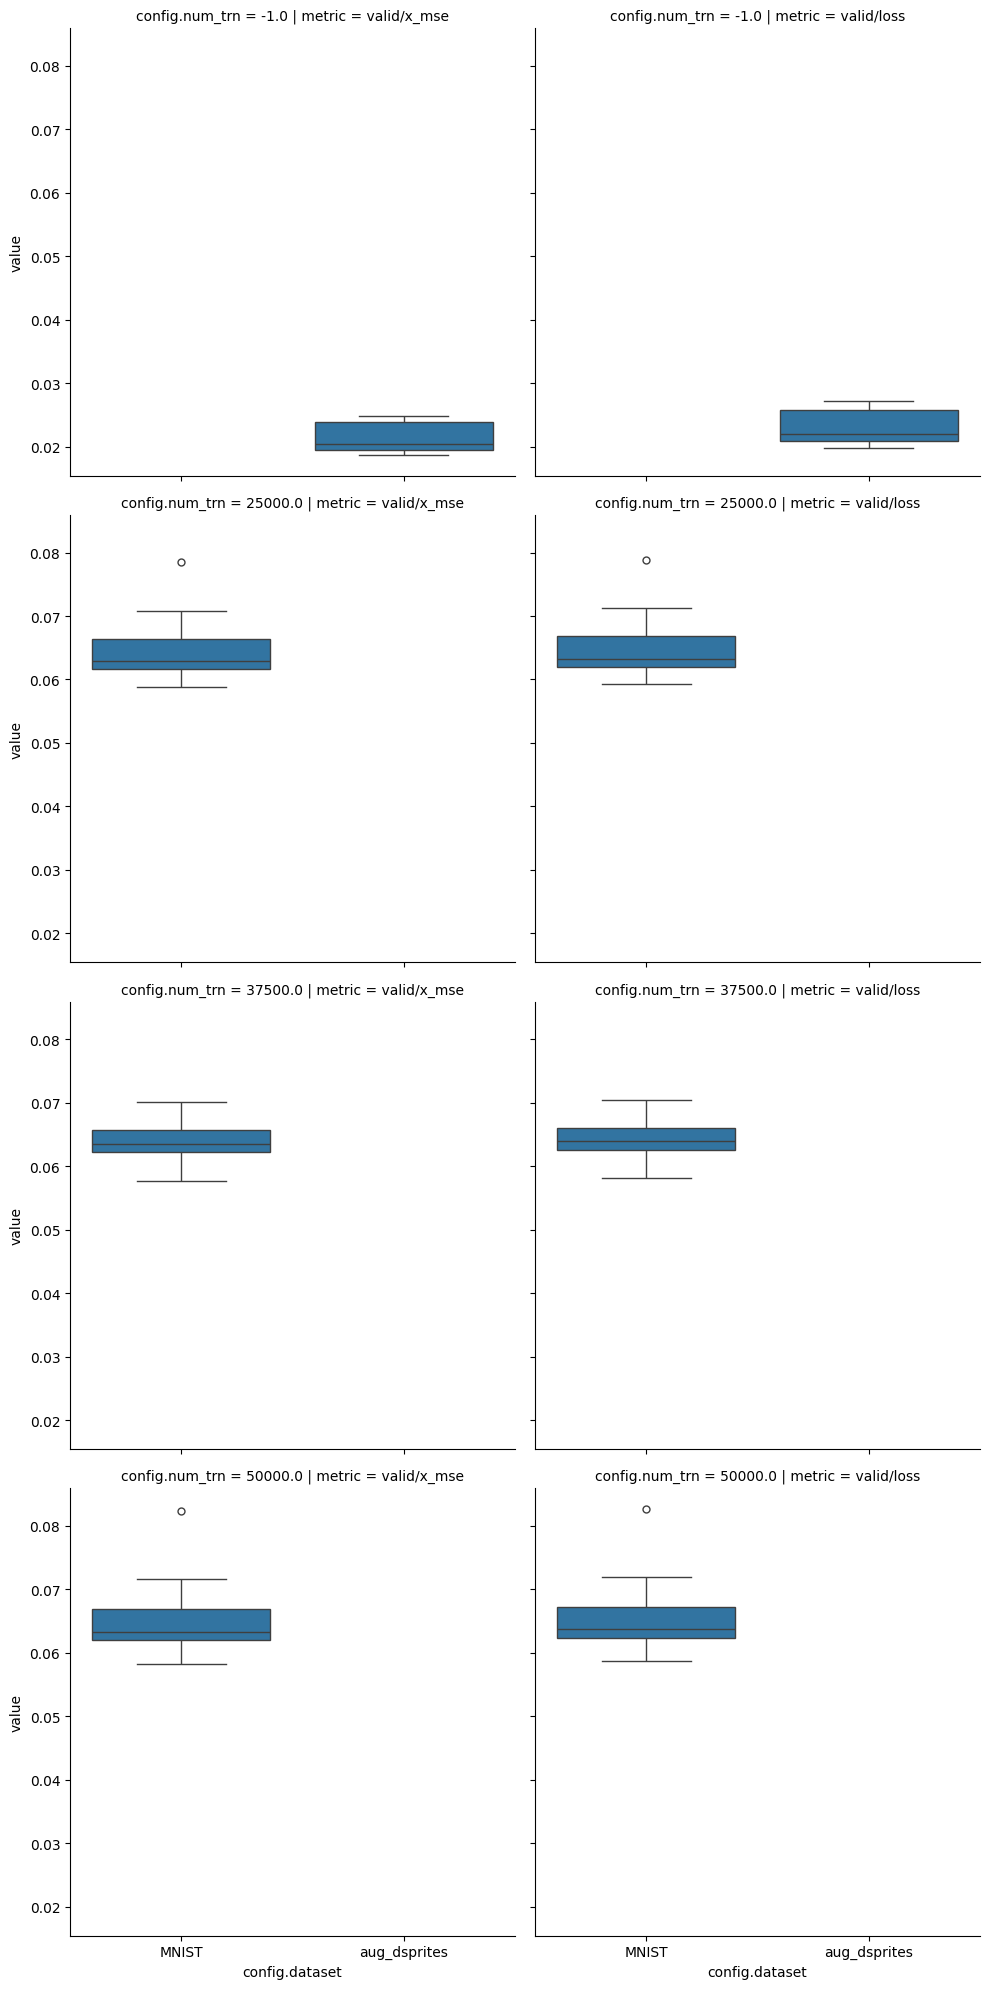

In [11]:
plot_df = df_filtered[[
    'summary.valid/x_mse', 'summary.valid/loss', 'config.angle',  'config.num_trn', 'config.dataset'
]]

# take only some settings
# plot_df = plot_df[
#     plot_df['config.init_lr'].isin([0.0003])
# ]

# pivot the data frame so that each of metrics is a column, and the values are the corresponding values
plot_df = plot_df.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'],
    value_vars=['summary.valid/x_mse', 'summary.valid/loss'],
    var_name='metric',
    value_name='value'
)

# remove the 'summary.' prefix from the metric names
plot_df['metric'] = plot_df['metric'].str.replace('summary.', '')


sns.catplot(data=plot_df, x="config.dataset", y="value", col="metric", row='config.num_trn', kind="box", showfliers=True, sharey=True)

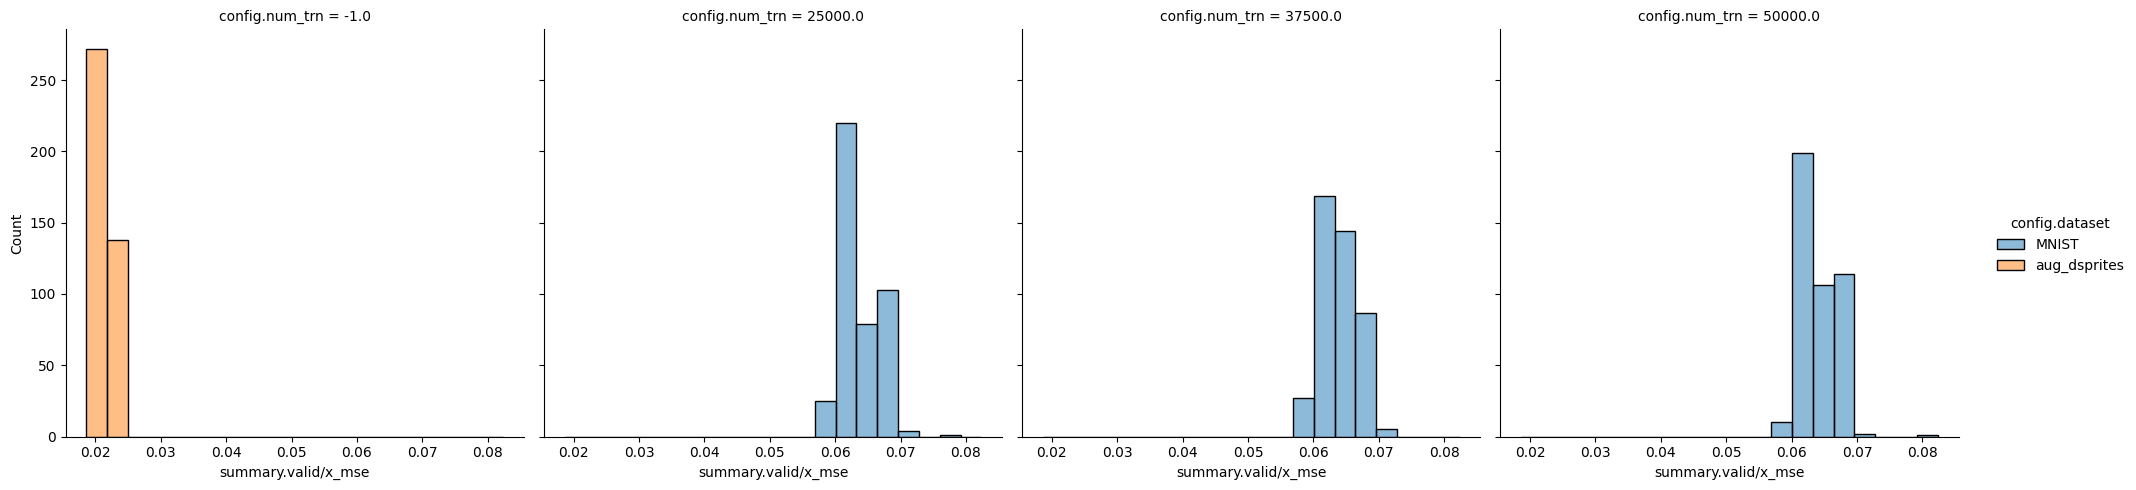

In [12]:
plot_df = df_filtered[[
    'summary.valid/x_mse', 'config.dataset', 'config.num_trn', 'config.angle'
]]

g = sns.displot(data=plot_df, x="summary.valid/x_mse", hue='config.dataset', col='config.num_trn', kind='hist', bins=20)

g

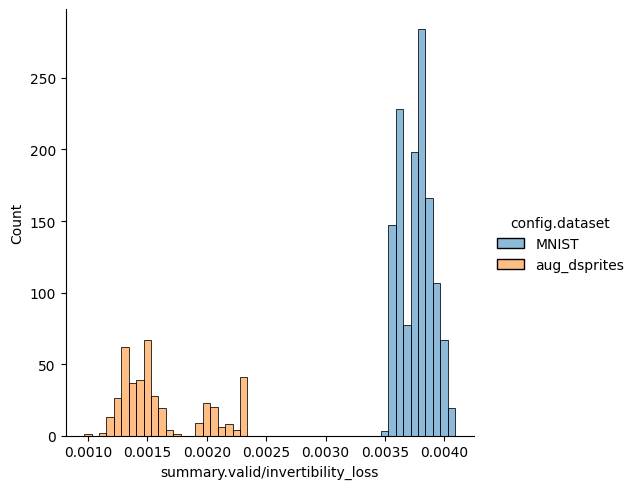

In [13]:
# plot the histograms of summary.valid/invertibility_loss for each dataset
plot_df = df_filtered[[
    'summary.valid/invertibility_loss', 'config.dataset'
]]

g = sns.displot(data=plot_df, x="summary.valid/invertibility_loss", hue='config.dataset', kind='hist', bins=50)

g

In [14]:
hyper_names = ['config.' + x for x in [
    'blur_σ_init', 'clip_norm', 'final_lr_mult', 'init_lr_mult', 'lr', 'warmup_steps_pct', 'seed'
]]

In [15]:
for name in hyper_names:
    df_filtered['config.n_samples'] = df_filtered['config.n_samples'].astype(str)

## Analize sweeps

In [16]:
df_filtered

,name,tags,id,state,sweep,summary.lr_σ,summary.blur_sigma,summary.train/loss,summary.σ,summary.train/x_mse,summary.train/invertibility_loss,summary._step,summary.train/η_recon_loss,summary._runtime,summary.valid/x_mse,summary.valid/invertibility_loss,summary.valid/label_paired_image_mse,summary.lr_inf,summary.valid/loss,summary.grad_norm,summary._timestamp,summary.valid/η_recon_loss,summary.inf_plots_0.width,summary.inf_plots_0.format,summary.inf_plots_0.height,summary.inf_plots_0.sha256,summary.inf_plots_0.path,summary.inf_plots_0.size,summary.inf_plots_0._type,summary.inf_plots_1.sha256,summary.inf_plots_1.path,summary.inf_plots_1.size,summary.inf_plots_1._type,summary.inf_plots_1.width,summary.inf_plots_1.format,summary.inf_plots_1.height,summary._wandb.runtime,summary.inf_plots_2.path,summary.inf_plots_2.size,summary.inf_plots_2._type,summary.inf_plots_2.width,summary.inf_plots_2.format,summary.inf_plots_2.height,summary.inf_plots_2.sha256,summary.inf_plots_5.size,summary.inf_plots_5._type,summary.inf_plots_5.width,summary.inf_plots_5.format,summary.inf_plots_5.height,summary.inf_plots_5.sha256,summary.inf_plots_5.path,summary.inf_training_metrics.path,summary.inf_training_metrics.size,summary.inf_training_metrics._type,summary.inf_training_metrics.width,summary.inf_training_metrics.format,summary.inf_training_metrics.height,summary.inf_training_metrics.sha256,summary.inf_plots_3.sha256,summary.inf_plots_3.path,summary.inf_plots_3.size,summary.inf_plots_3._type,summary.inf_plots_3.width,summary.inf_plots_3.format,summary.inf_plots_3.height,summary.inf_plots_4.height,summary.inf_plots_4.sha256,summary.inf_plots_4.path,summary.inf_plots_4.size,summary.inf_plots_4._type,summary.inf_plots_4.width,summary.inf_plots_4.format,config.lr,config.seed,config.angle,config.steps,config.σ_lr,config.dataset,config.num_trn,config.num_val,config.pp_eval,config.shuffle,config.pp_train,config.clip_norm,config.eval_freq,config.n_samples,config.val_split,config.batch_size,config.model_name,config.train_split,config.blur_end_pct,config.blur_σ_init,config.init_lr_mult,config.weight_decay,config.η_loss_mult,config.final_lr_mult,config.augment_bounds,config.augment_offset,config.translate_last,config.x_mse_loss_mult,config.blur_filter_size,config.warmup_steps_pct,config.interpolation_order,config.shuffle_buffer_size,config.repeat_after_batching,config.invertibility_loss_mult,config.model.hidden_dims,config.model.squash_to_bounds,config.aug_dsprites.heart_distribution.scale,config.aug_dsprites.heart_distribution.x_position,config.aug_dsprites.heart_distribution.y_position,config.aug_dsprites.heart_distribution.orientation,config.aug_dsprites.heart_distribution.unnormalised_shape_prob,config.aug_dsprites.square_distribution.scale,config.aug_dsprites.square_distribution.x_position,config.aug_dsprites.square_distribution.y_position,config.aug_dsprites.square_distribution.orientation,config.aug_dsprites.square_distribution.unnormalised_shape_prob,config.aug_dsprites.ellipse_distribution.scale,config.aug_dsprites.ellipse_distribution.x_position,config.aug_dsprites.ellipse_distribution.y_position,config.aug_dsprites.ellipse_distribution.orientation,config.aug_dsprites.ellipse_distribution.unnormalised_shape_prob
0,drawn-sweep-143,[],fidsfil9,finished,inf_grid_mnist_sweep_000_50k,0.001,0.0,0.067826,0.000007,0.067429,0.003973,60000.0,0.114906,1434.582302,0.067115,0.003920,0.328576,1.000000e-06,0.067507,0.492628,1.701763e+09,0.114119,1500.0,png,300.0,fc63326057b3d3d1cb79249b8a59a632702d58aa3dc031...,media/images/inf_plots_0_summary_fc63326057b3d...,77624.0,image-file,f8ad7709986253d11c1e00dc8d878f3e5de7fb12d0af61...,media/images/inf_plots_1_summary_f8ad770998625...,82777.0,image-file,1500.0,png,300.0,1442.0,media/images/inf_plots_2_summary_a13bb328bfffa...,85393.0,image-file,1500.0,png,300.0,a13bb328bfffa5b354a407d49723ccd322877c5295a97f...,71282.0,image-file,1500.0,png,300.0,13d36c2dd12519871c671c59d968794da32154544fed95...,media/images/inf_plots_5_summary

In [17]:
# mnist_condition = (df_filtered['config.dataset'] == 'MNIST') & (df_filtered['summary.valid/x_mse'] < 0.15)
# aug_dsprites_condition = (df_filtered['config.dataset'] == 'aug_dsprites') & (df_filtered['summary.valid/x_mse'] < 0.15)
# df_filtered_ = df_filtered[mnist_condition | aug_dsprites_condition]

df_filtered_ = df_filtered

# df_filtered_

In [18]:
# pivot the data frame so that each of 'summary.valid/x_mse', 'summary.valid/loss', 'summary.valid/label_paired_image_mse'
# is a column, and the values are the corresponding values
df = df_filtered_.melt(
    id_vars=['config.angle', 'config.num_trn', 'config.dataset'] + hyper_names,
    value_vars=['summary.valid/x_mse', 'summary.valid/loss', 'summary.valid/label_paired_image_mse'],
    var_name='metric',
    value_name='value'
)

df

,config.angle,config.num_trn,config.dataset,config.blur_σ_init,config.clip_norm,config.final_lr_mult,config.init_lr_mult,config.lr,config.warmup_steps_pct,config.seed,metric,value
0,0.0,50000.0,MNIST,3,10,0.0010,0.03,0.0010,0.10,0,summary.valid/x_mse,0.067115
1,0.0,50000.0,MNIST,3,10,0.0010,0.03,0.0010,0.20,0,summary.valid/x_mse,0.066160
2,0.0,50000.0,MNIST,3,10,0.0010,0.03,0.0010,0.05,0,summary.valid/x_mse,0.068644
3,0.0,50000.0,MNIST,3,10,0.0010,0.03,0.0003,0.20,0,summary.valid/x_mse,0.061256
4,0.0,50000.0,MNIST,3,10,0.0010,0.03,0.0003,0.10,0,summary.valid/x_mse,0.061435
...,...,...,...,...,...,...,...,...,...,...,...,...
5173,0.0,-1.0,aug_dsprites,0,3,0.0003,0.01,0.0003,0.05,2,summary.valid/label_paired_image_mse,0.012576
5174,0.0,-1.0,aug_dsprites,0,3,0.0003,0.01,0.0003,0.10,2,summary.valid/label_paired_image_mse,0.012169
5175,0.0,-1.0,aug_dsprites,0,3,0.0003,0.01,0.0003,0.20,2,summary.valid/label_paired_image_mse,0.011938
5176,0.0,-1.0,aug_dsprites,0,3,0.0003,0.01,0.0001,0.20,2,summary.valid/label_paired_image_mse,0.013236


In [19]:
print(df['config.blur_σ_init'].unique())

[3 0]


In [20]:
METRIC = 'summary.valid/x_mse'
# METRIC = 'summary.valid/label_paired_image_mse'

In [21]:
hyper_names

['config.blur_σ_init',
 'config.clip_norm',
 'config.final_lr_mult',
 'config.init_lr_mult',
 'config.lr',
 'config.warmup_steps_pct',
 'config.seed']

In [22]:
idx_vars = ['config.' + x for x in [
    'blur_σ_init', 'clip_norm', 'final_lr_mult', 'init_lr_mult', 'lr', 'warmup_steps_pct',
]]
df[df.metric == METRIC].set_index(idx_vars).groupby(['config.dataset', 'config.num_trn', 'config.seed',])['value'].nsmallest(3).reset_index().set_index(['config.dataset', 'config.num_trn', 'config.seed',])

config.blur_σ_init  \
config.dataset config.num_trn config.seed                       
MNIST           25000.0       0                             0   
                              0                             0   
                              0                             0   
                              1                             3   
                              1                             3   
                              1                             3   
                              2                             0   
                              2                             0   
                              2                             0   
                37500.0       0                             0   
                              0                             0   
                              0                             0   
                              1                             3   
                              1                             3   
                              1                             0   
                              2                             3   
                              2                             3   
                              2                             0   
                50000.0       0                             0   
                              0                             3   
                              0                             3   
                              1                             0   
                              1                             0   
                              1                             0   
                              2                             0   
                              2                             0   
                              2                             3   
aug_dsprites   -1.0           0                             3   
                              0                             3   
                              0                             0   
                              1                             3   
                              1                             0   
                              1                             3   
                              2                             3   
                              2                             0   
                              2                             0   

                                           config.clip_norm  \
config.dataset config.num_trn config.seed                     
MNIST           25000.0       0                          10   
                              0                          10   
                              0                           3   
                              1                          10   
                              1                          10   
                              1                           3   
                              2                           3   
                              2                          10   
                              2                          10   
                37500.0       0                          10   
                              0                          10   
                              0                           3   
                              1                          10   
                              1                          10   
                              1                          10   
                              2                           3   
                              2                          10   
                              2                          10   
                50000.0       0                          10   
                              0                           3   
                              0                           3   
                              1                          10   
                              1                          10 

In [23]:
df[(df.metric == METRIC)].groupby(
    ['config.dataset', 'config.num_trn'] + idx_vars
    )['value'].mean().reset_index().set_index(idx_vars
    ).groupby(['config.dataset', 'config.num_trn',])['value'].nsmallest(3
    ).reset_index().set_index(['config.dataset', 'config.num_trn',])

config.blur_σ_init  config.clip_norm  \
config.dataset config.num_trn                                         
MNIST           25000.0                         0                10   
                25000.0                         3                10   
                25000.0                         0                 3   
                37500.0                         0                10   
                37500.0                         3                10   
                37500.0                         0                10   
                50000.0                         0                 3   
                50000.0                         0                10   
                50000.0                         3                10   
aug_dsprites   -1.0                             3                10   
               -1.0                             3                 3   
               -1.0                             3                10   

                               config.final_lr_mult  config.init_lr_mult  \
config.dataset config.num_trn                                              
MNIST           25000.0                      0.0003                 0.03   
                25000.0                      0.0010                 0.03   
                25000.0                      0.0010                 0.03   
                37500.0                      0.0003                 0.03   
                37500.0                      0.0003                 0.03   
                37500.0                      0.0003                 0.01   
                50000.0                      0.0010                 0.01   
                50000.0                      0.0003                 0.01   
                50000.0                      0.0010                 0.03   
aug_dsprites   -1.0                          0.0003                 0.03   
               -1.0                          0.0010                 0.01   
               -1.0                          0.0003                 0.01   

                               config.lr  config.warmup_steps_pct     value  
config.dataset config.num_trn                                                
MNIST           25000.0           0.0003                     0.10  0.060061  
                25000.0           0.0003                     0.10  0.060779  
                25000.0           0.0003                     0.05  0.060794  
                37500.0           0.0003                     0.20  0.060745  
                37500.0           0.0003                     0.10  0.060826  
                37500.0           0.0003                     0.05  0.060848  
                50000.0           0.0003                     0.05  0.060552  
                50000.0           0.0003                     0.05  0.060652  
                50000.0           0.0003                     0.20  0.060739  
aug_dsprites   -1.0               0.0010                     0.20  0.019077  
               -1.0               0.0010                     0.20  0.019081  
               -1.0               0.0010                     0.20  0.019090

### blur_σ_init

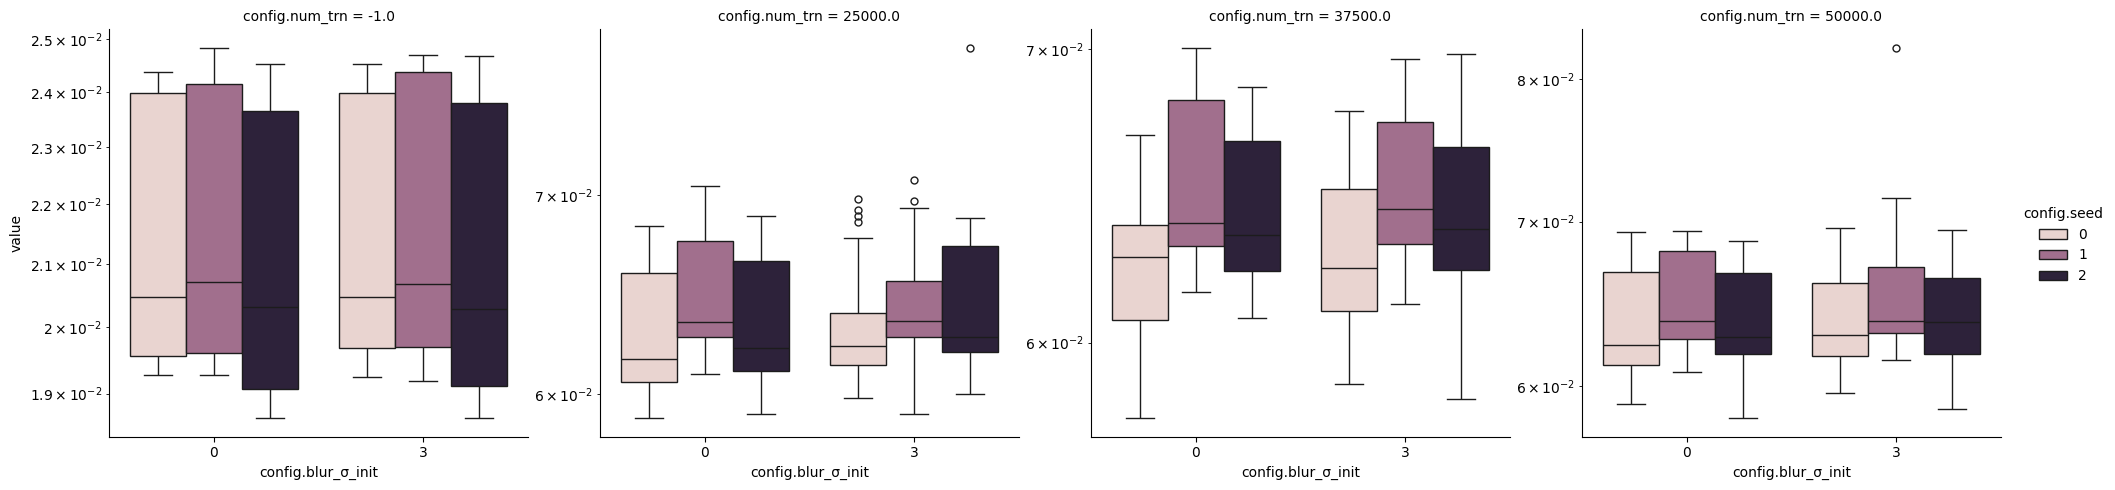

In [24]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.blur_σ_init",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g

### clip_norm

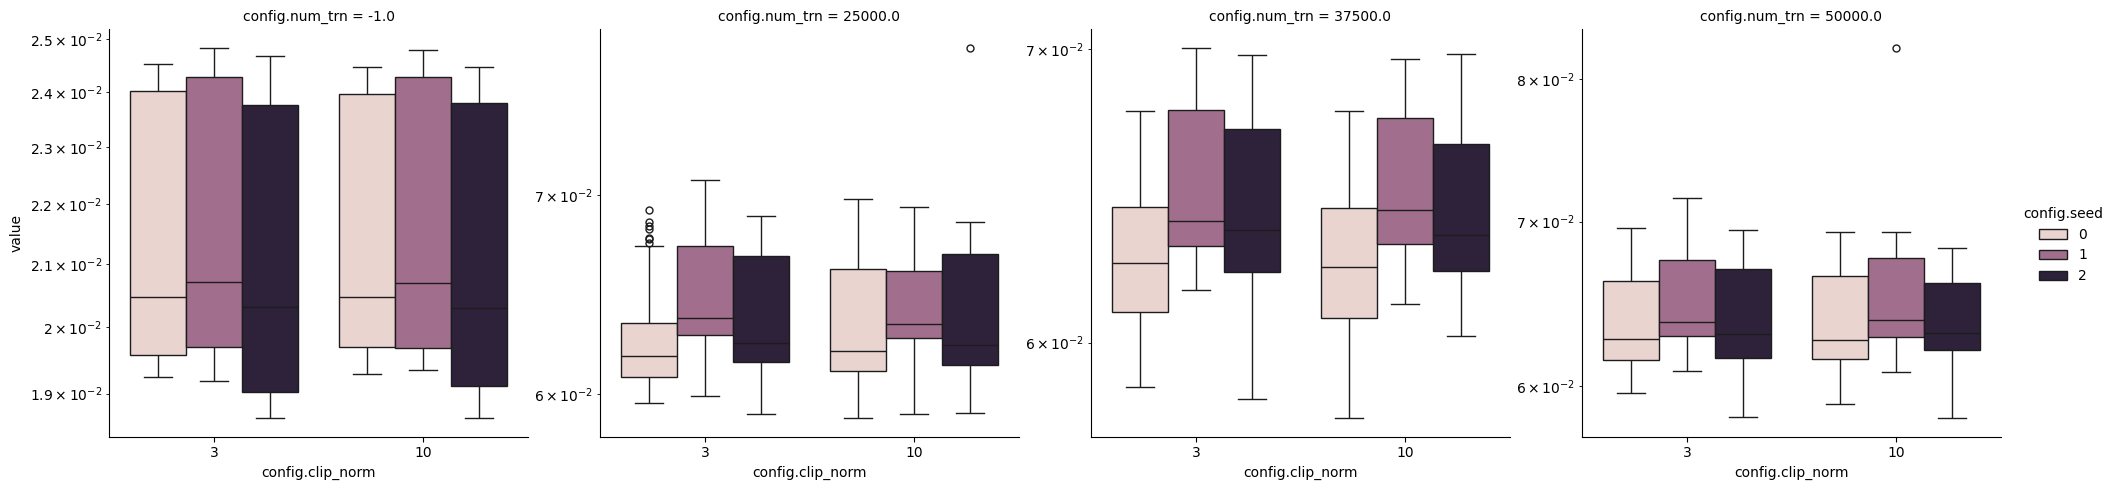

In [25]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.clip_norm",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g

### final_lr_mult

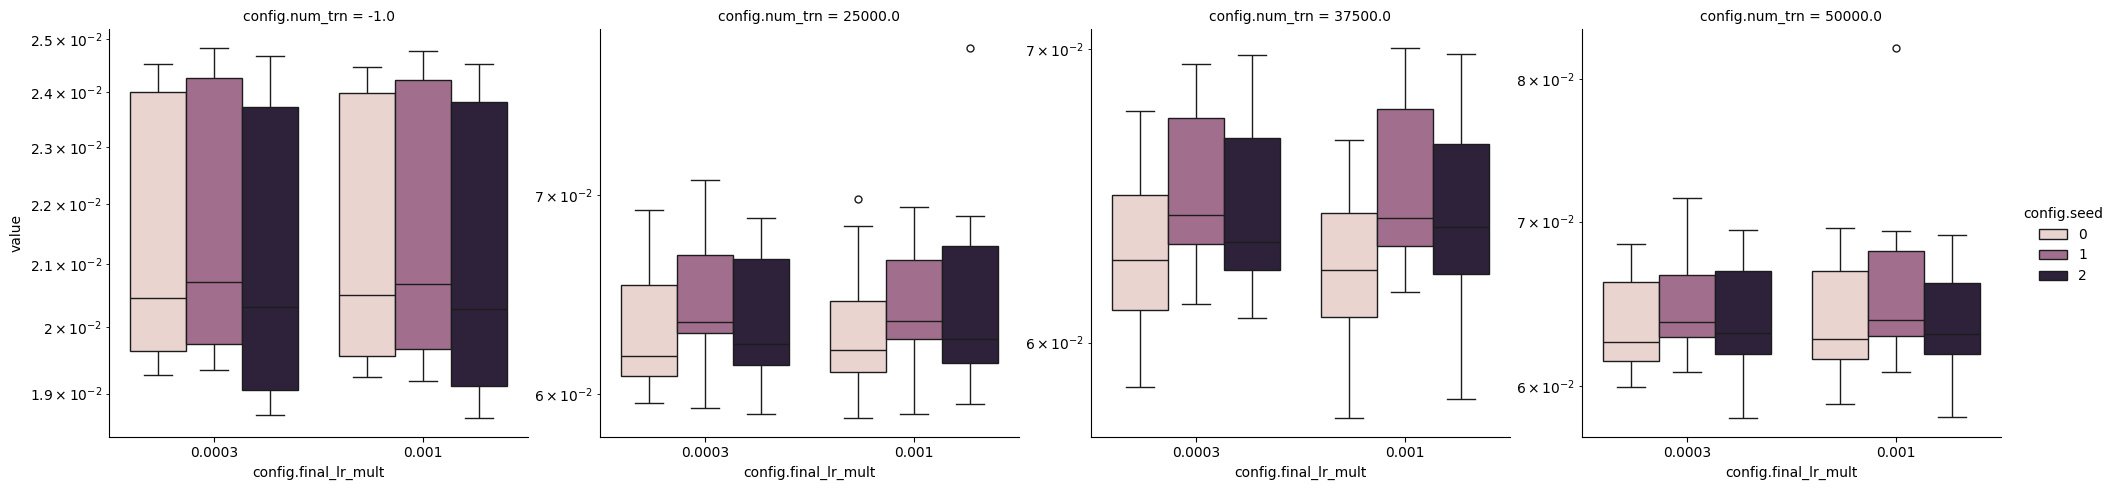

In [26]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.final_lr_mult",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g

### init_lr_mult

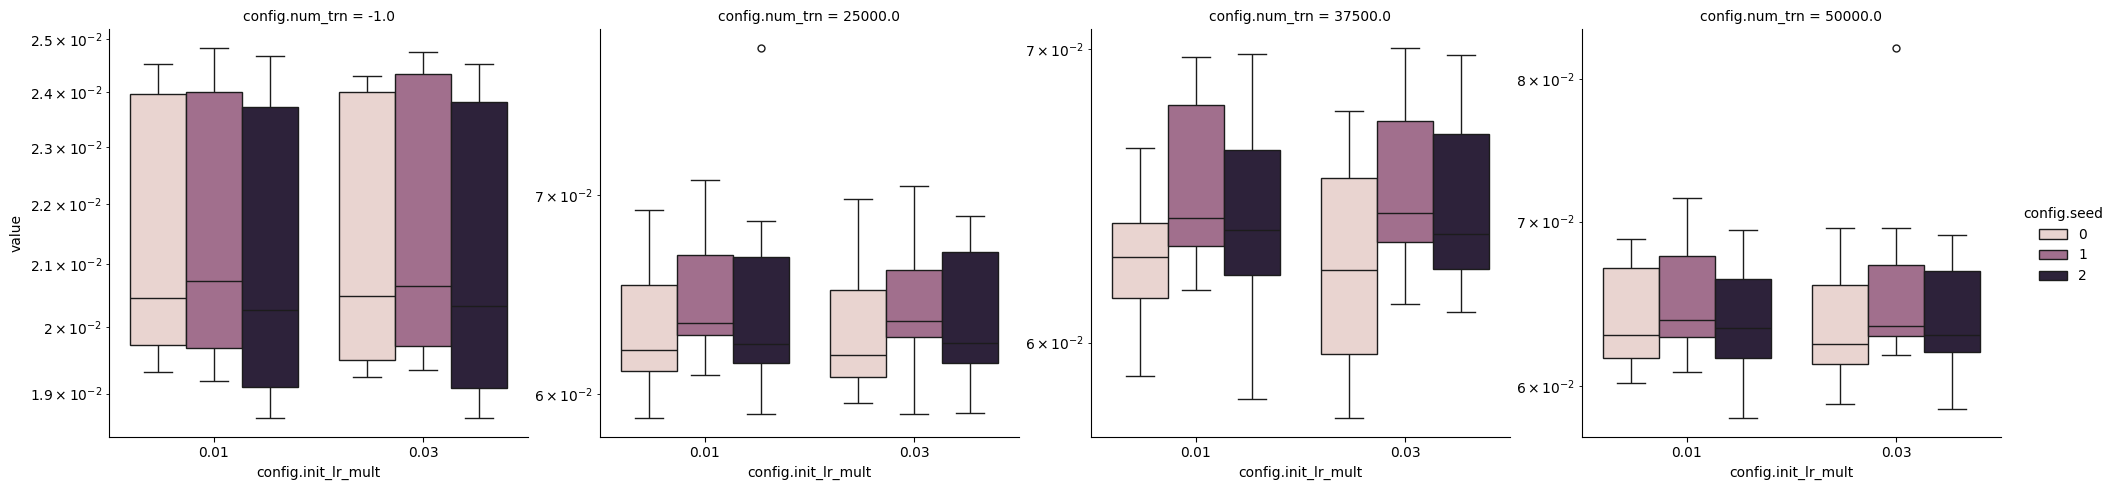

In [27]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.init_lr_mult",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g

### lr

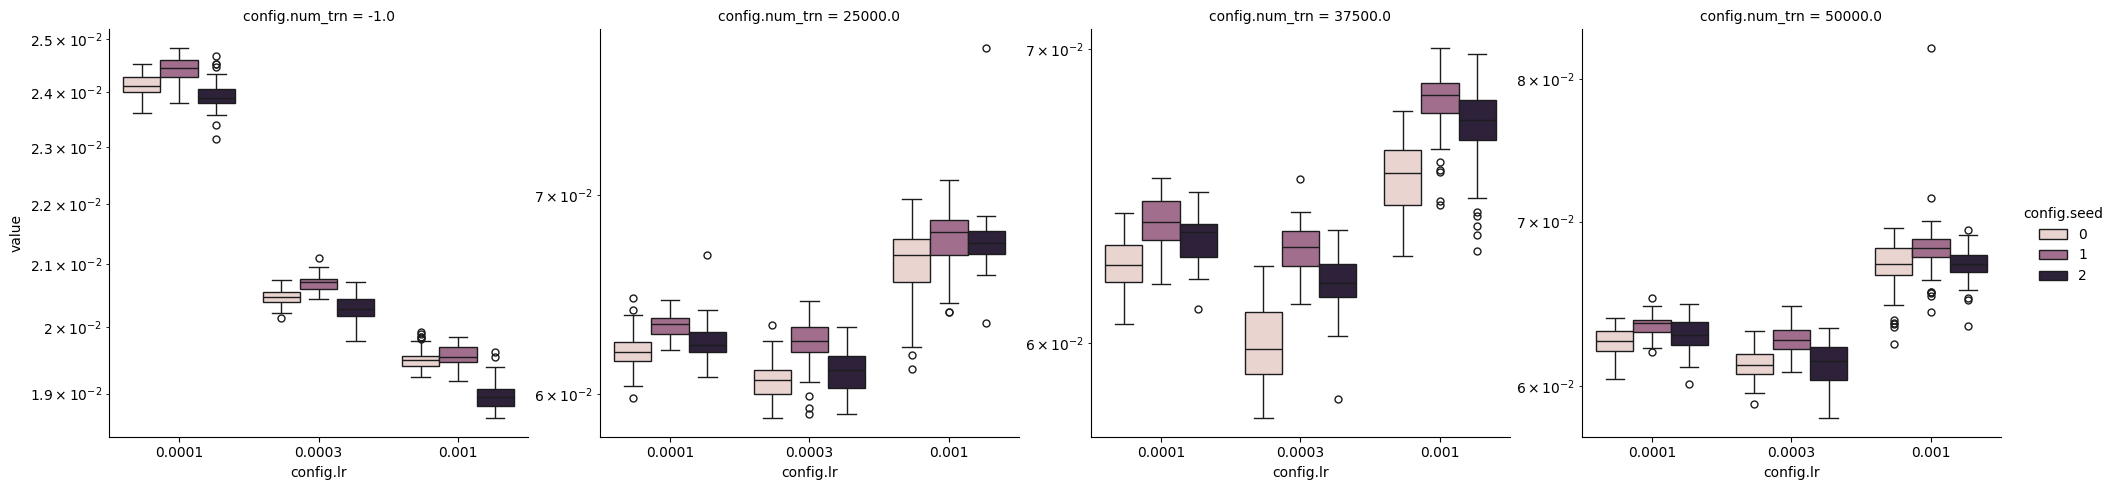

In [28]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.lr",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g

### warmup_steps_pct

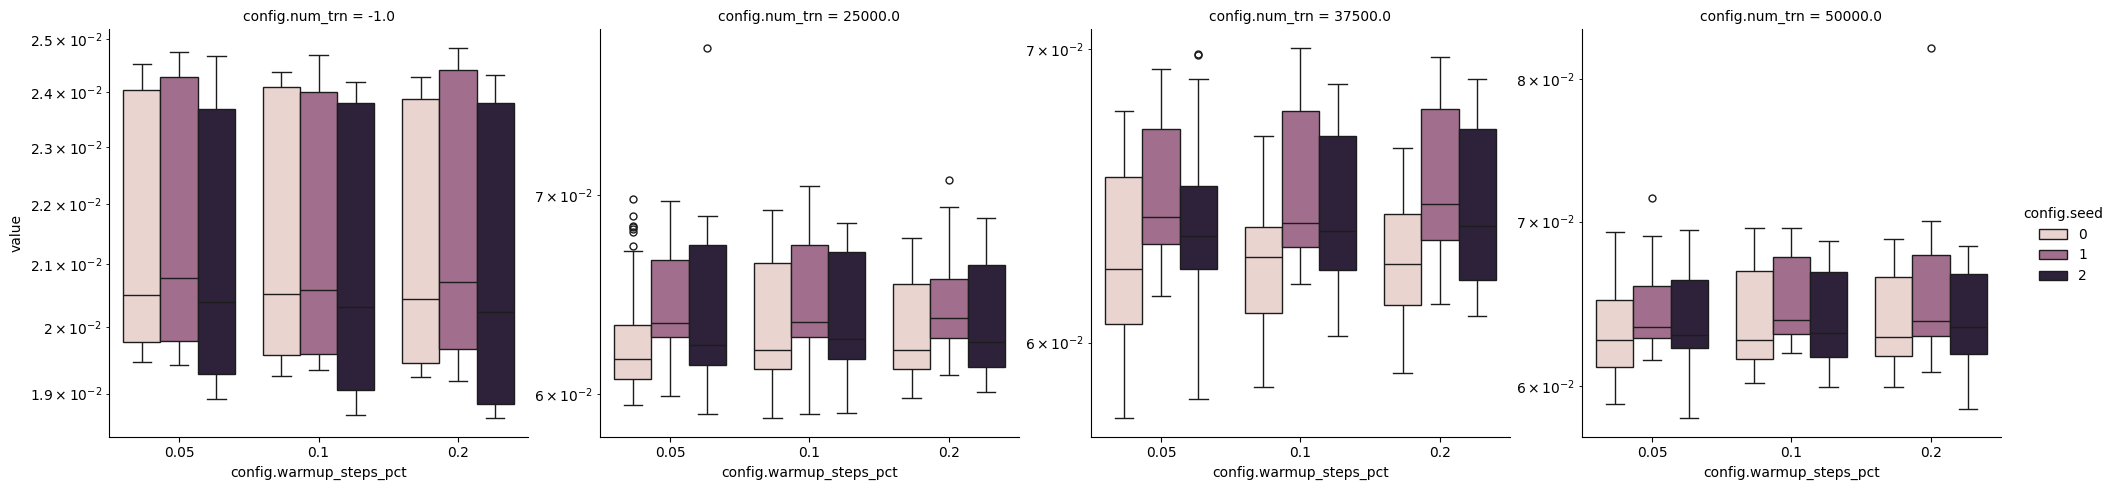

In [29]:
g = sns.catplot(
    data=df[df.metric == METRIC],
    x="config.warmup_steps_pct",
    y="value",
    col="config.num_trn", hue='config.seed',
    kind="box",
    sharex=True, sharey=False,
)

g.set(yscale="log")

g